In [1]:
import sys
sys.path.append("../")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sns.set_context('paper')
import logging
logging.basicConfig(format='%(asctime)s %(levelname)-7s %(message)s',
                    stream=sys.stderr, level=logging.INFO)
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.INFO)

import os

from pathlib import Path
import pandas as pd
import json
from collections import Counter


#In-house Module Imports
from config import Configuration 

In [4]:
user = "aksar"
logging.warning(f'Are you sure that you are: {user}?')

2022-04-18 11:19:40,070 WARNING Are you sure that you are: aksar?


In [5]:
#Update these

PARENT_DIR = 'active_learning_experiments'
SYSTEM = 'volta'
FE_NAME = 'tsfresh'
EXP_NAME = f'{FE_NAME}_experiments'
DIR_NAME_TO_GENERATE_RESULTS = 'exp_2_active_learning_investigation' #batch_unseen_app_results

In [6]:
OUTPUT_DIR = f'/projectnb/peaclab-mon/{user}/{PARENT_DIR}' # or feature_extraction_experiments
CV_INDEX = 0
SCALER = 'None' #For now, do the scaling inside the notebook, then you can move that to the class function

In [7]:
conf = Configuration(ipython=True,
                     overrides={
                         'output_dir': Path(OUTPUT_DIR), #change
                         'system' : SYSTEM,
                         'exp_name':EXP_NAME,                                                  
                         'cv_fold':CV_INDEX, 
                         'model_config': DIR_NAME_TO_GENERATE_RESULTS
                     })

with open(str(conf['experiment_dir']) + '/anom_dict.json') as f:
    ANOM_DICT = json.load(f)
with open(str(conf['experiment_dir']) + '/app_dict.json') as f:
    APP_DICT = json.load(f) 
    
APP_REVERSE_DICT = {}
for app_name, app_encoding in APP_DICT.items():
    APP_REVERSE_DICT[str(app_encoding)] = app_name    

ANOM_REVERSE_DICT = {}
for anom_name, anom_encoding in ANOM_DICT.items():
    ANOM_REVERSE_DICT[str(anom_encoding)] = anom_name

2022-04-18 11:19:41,797 WARNING You set windowing False, but you are trying to define window_size parameter, it is automatically set to 0. Please double check.
2022-04-18 11:19:41,798 INFO    Setting directory names
2022-04-18 11:19:41,804 INFO    Model config folder already exists, be careful, otherwise it will overwrite!
2022-04-18 11:19:41,810 INFO    Saving configuration as CSV


# The configuration used for this run:
# {'cv_fold': 0,
#  'exp_name': 'tsfresh_experiments',
#  'experiment_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments'),
#  'feature_extract': False,
#  'feature_select': False,
#  'hdf_data_path': PosixPath('/projectnb/peaclab-mon/aksar/datasets/tpds_data_hdfs'),
#  'metadata_path': None,
#  'model_config': 'exp_2_active_learning_investigation',
#  'model_config_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_0/exp_2_active_learning_investigation'),
#  'model_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_0/exp_2_active_learning_investigation/model'),
#  'num_split': 5,
#  'operation': 'read',
#  'output_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta'),
#  'plots_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_expe

In [8]:
result_df = pd.DataFrame()
result_list = []

for cv_index in [0,1,2,3,4]:

    conf = Configuration(ipython=True,
                         overrides={
                             'output_dir': Path(OUTPUT_DIR), #change
                             'system' : SYSTEM,
                             'exp_name':EXP_NAME,                                                  
                             'cv_fold':cv_index, 
                             'model_config': DIR_NAME_TO_GENERATE_RESULTS
                         }
                        )
    
    for filename in os.listdir(conf['results_dir']):

        if  "app-anom-selection" in filename:
            
            only_filename = filename.split('.')
            splitted_filename = only_filename[0].split('#')
            train_apps = splitted_filename[0].split(':')[1]
            test_apps = splitted_filename[1].split(':')[1]

            feature_count = splitted_filename[3]            
            method = splitted_filename[4]
            query_strategy = splitted_filename[5]
            query_size = splitted_filename[6]
            model_name = splitted_filename[7]

            num_unknown_test_apps = len(test_apps.split("-"))
            num_known_train_apps = len(train_apps.split("-"))        

            temp_csv = pd.read_csv(Path(conf['results_dir']) / filename)

            temp_csv['cv_index'] = cv_index
            temp_csv['num_known_train_apps'] = num_known_train_apps
            temp_csv['num_unknown_test_apps'] = num_unknown_test_apps
            temp_csv['train_apps'] = train_apps
            temp_csv['test_apps'] = test_apps
            temp_csv['feature_count'] = feature_count
            temp_csv['method'] = method
            temp_csv['query_strategy'] = query_strategy
            temp_csv['query_size'] = query_size
            temp_csv['model_name'] = model_name
            temp_csv['fold'] = cv_index
                        
            result_list.append(temp_csv)
               
    result_df = pd.concat(result_list, axis=0)    
    result_df['anoms'] = result_df['anoms'].apply(lambda x: ANOM_REVERSE_DICT[str(x)])

2022-04-18 11:19:42,388 WARNING You set windowing False, but you are trying to define window_size parameter, it is automatically set to 0. Please double check.
2022-04-18 11:19:42,388 INFO    Setting directory names
2022-04-18 11:19:42,389 INFO    Model config folder already exists, be careful, otherwise it will overwrite!
2022-04-18 11:19:42,390 INFO    Saving configuration as CSV


# The configuration used for this run:
# {'cv_fold': 0,
#  'exp_name': 'tsfresh_experiments',
#  'experiment_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments'),
#  'feature_extract': False,
#  'feature_select': False,
#  'hdf_data_path': PosixPath('/projectnb/peaclab-mon/aksar/datasets/tpds_data_hdfs'),
#  'metadata_path': None,
#  'model_config': 'exp_2_active_learning_investigation',
#  'model_config_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_0/exp_2_active_learning_investigation'),
#  'model_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_0/exp_2_active_learning_investigation/model'),
#  'num_split': 5,
#  'operation': 'read',
#  'output_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta'),
#  'plots_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_expe

2022-04-18 11:19:53,720 WARNING You set windowing False, but you are trying to define window_size parameter, it is automatically set to 0. Please double check.
2022-04-18 11:19:53,721 INFO    Setting directory names
2022-04-18 11:19:53,724 INFO    Model config folder already exists, be careful, otherwise it will overwrite!
2022-04-18 11:19:53,729 INFO    Saving configuration as CSV


# The configuration used for this run:
# {'cv_fold': 1,
#  'exp_name': 'tsfresh_experiments',
#  'experiment_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments'),
#  'feature_extract': False,
#  'feature_select': False,
#  'hdf_data_path': PosixPath('/projectnb/peaclab-mon/aksar/datasets/tpds_data_hdfs'),
#  'metadata_path': None,
#  'model_config': 'exp_2_active_learning_investigation',
#  'model_config_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_1/exp_2_active_learning_investigation'),
#  'model_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_1/exp_2_active_learning_investigation/model'),
#  'num_split': 5,
#  'operation': 'read',
#  'output_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta'),
#  'plots_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_expe

2022-04-18 11:20:05,769 WARNING You set windowing False, but you are trying to define window_size parameter, it is automatically set to 0. Please double check.
2022-04-18 11:20:05,771 INFO    Setting directory names
2022-04-18 11:20:05,773 INFO    Model config folder already exists, be careful, otherwise it will overwrite!
2022-04-18 11:20:05,778 INFO    Saving configuration as CSV


# The configuration used for this run:
# {'cv_fold': 2,
#  'exp_name': 'tsfresh_experiments',
#  'experiment_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments'),
#  'feature_extract': False,
#  'feature_select': False,
#  'hdf_data_path': PosixPath('/projectnb/peaclab-mon/aksar/datasets/tpds_data_hdfs'),
#  'metadata_path': None,
#  'model_config': 'exp_2_active_learning_investigation',
#  'model_config_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_2/exp_2_active_learning_investigation'),
#  'model_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_2/exp_2_active_learning_investigation/model'),
#  'num_split': 5,
#  'operation': 'read',
#  'output_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta'),
#  'plots_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_expe

2022-04-18 11:20:19,587 WARNING You set windowing False, but you are trying to define window_size parameter, it is automatically set to 0. Please double check.
2022-04-18 11:20:19,589 INFO    Setting directory names
2022-04-18 11:20:19,592 INFO    Model config folder already exists, be careful, otherwise it will overwrite!
2022-04-18 11:20:19,597 INFO    Saving configuration as CSV


# The configuration used for this run:
# {'cv_fold': 3,
#  'exp_name': 'tsfresh_experiments',
#  'experiment_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments'),
#  'feature_extract': False,
#  'feature_select': False,
#  'hdf_data_path': PosixPath('/projectnb/peaclab-mon/aksar/datasets/tpds_data_hdfs'),
#  'metadata_path': None,
#  'model_config': 'exp_2_active_learning_investigation',
#  'model_config_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_3/exp_2_active_learning_investigation'),
#  'model_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_3/exp_2_active_learning_investigation/model'),
#  'num_split': 5,
#  'operation': 'read',
#  'output_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta'),
#  'plots_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_expe

2022-04-18 11:20:33,480 WARNING You set windowing False, but you are trying to define window_size parameter, it is automatically set to 0. Please double check.
2022-04-18 11:20:33,481 INFO    Setting directory names
2022-04-18 11:20:33,484 INFO    Model config folder already exists, be careful, otherwise it will overwrite!
2022-04-18 11:20:33,489 INFO    Saving configuration as CSV


# The configuration used for this run:
# {'cv_fold': 4,
#  'exp_name': 'tsfresh_experiments',
#  'experiment_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments'),
#  'feature_extract': False,
#  'feature_select': False,
#  'hdf_data_path': PosixPath('/projectnb/peaclab-mon/aksar/datasets/tpds_data_hdfs'),
#  'metadata_path': None,
#  'model_config': 'exp_2_active_learning_investigation',
#  'model_config_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_4/exp_2_active_learning_investigation'),
#  'model_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_experiments/CV_4/exp_2_active_learning_investigation/model'),
#  'num_split': 5,
#  'operation': 'read',
#  'output_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta'),
#  'plots_dir': PosixPath('/projectnb/peaclab-mon/aksar/active_learning_experiments/volta/tsfresh_expe

In [9]:
unique_methods = result_df['method'].unique()
logging.info("Unique Methods: %s", unique_methods)
unique_query_strategies = result_df['query_strategy'].unique()
logging.info("Unique query strategies: %s",unique_query_strategies)
unique_feature_counts = sorted(result_df['feature_count'].unique())
logging.info("Num Features: %s", unique_feature_counts)
unique_query_sizes = sorted(result_df['query_size'].unique())
logging.info("Unique query sizes: %s",unique_query_sizes)
unique_known_train_apps = result_df['num_known_train_apps'].unique()
logging.info("Number of Known Apps in the Training: %s", unique_known_train_apps)
unique_unknown_test_apps = result_df['num_unknown_test_apps'].unique()
logging.info("Number of Unknown Apps in the Test: %s", unique_unknown_test_apps)
unique_folds = len(result_df[result_df['query_strategy'] != 'random']['fold'].unique())
logging.info("Number of Folds for the Active Learning Methods: %s", unique_folds)

2022-04-18 11:20:48,236 INFO    Unique Methods: ['active_learning']
2022-04-18 11:20:48,248 INFO    Unique query strategies: ['uncertainty']
2022-04-18 11:20:48,257 INFO    Num Features: ['2000']
2022-04-18 11:20:48,265 INFO    Unique query sizes: ['50']
2022-04-18 11:20:48,267 INFO    Number of Known Apps in the Training: [6 4 8 2]
2022-04-18 11:20:48,270 INFO    Number of Unknown Apps in the Test: [5 7 3 9]
2022-04-18 11:20:48,355 INFO    Number of Folds for the Active Learning Methods: 5


In [10]:
result_df.head()

,apps,anoms,cv_index,num_known_train_apps,num_unknown_test_apps,train_apps,test_apps,feature_count,method,query_strategy,query_size,model_name,fold
0,miniMD,none,0,6,5,miniMD-lu-miniAMR-ft-bt-cg,mg-kripke-CoMD-sp-miniGhost,2000,active_learning,uncertainty,50,RandomForestClassifier,0
1,miniAMR,none,0,6,5,miniMD-lu-miniAMR-ft-bt-cg,mg-kripke-CoMD-sp-miniGhost,2000,active_learning,uncertainty,50,RandomForestClassifier,0
2,ft,leak,0,6,5,miniMD-lu-miniAMR-ft-bt-cg,mg-kripke-CoMD-sp-miniGhost,2000,active_learning,uncertainty,50,RandomForestClassifier,0
3,bt,memeater,0,6,5,miniMD-lu-miniAMR-ft-bt-cg,mg-kripke-CoMD-sp-miniGhost,2000,active_learning,uncertainty,50,RandomForestClassifier,0
4,CoMD,none,0,6,5,miniMD-lu-miniAMR-ft-bt-cg,mg-kripke-CoMD-sp-miniGhost,2000,active_learning,uncertainty,50,RandomForestClassifier,0


In [11]:
unique_known_train_apps = sorted(unique_known_train_apps)
unique_known_train_apps

[2, 4, 6, 8]

In [12]:
param_dict = {
                'fig_width': 36,
                'fig_height': 12,
                'y_label_font': 36,
                'x_label_font': 36,
                 'x_ticks_font': 32,
                 'y_ticks_font': 40,    
                'legend_size': 30,
                'legend_title_size': 40,
                'title_size': 36,
                'title_pad': 40,             
             }

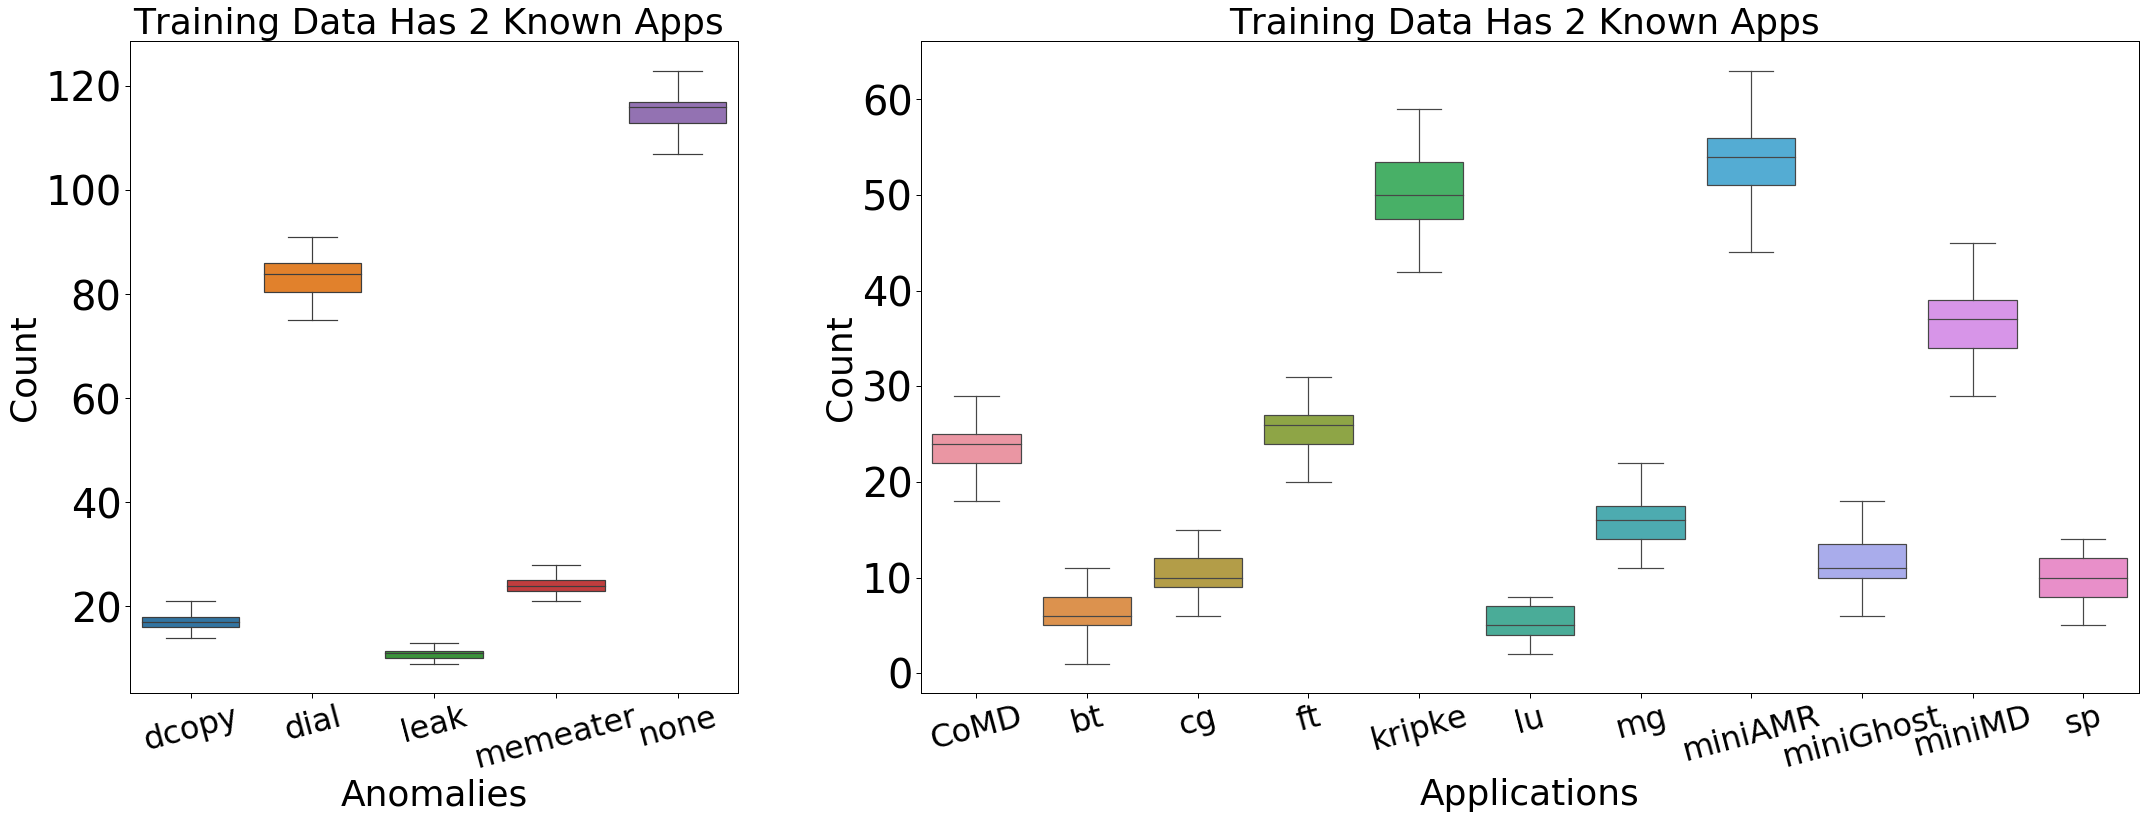

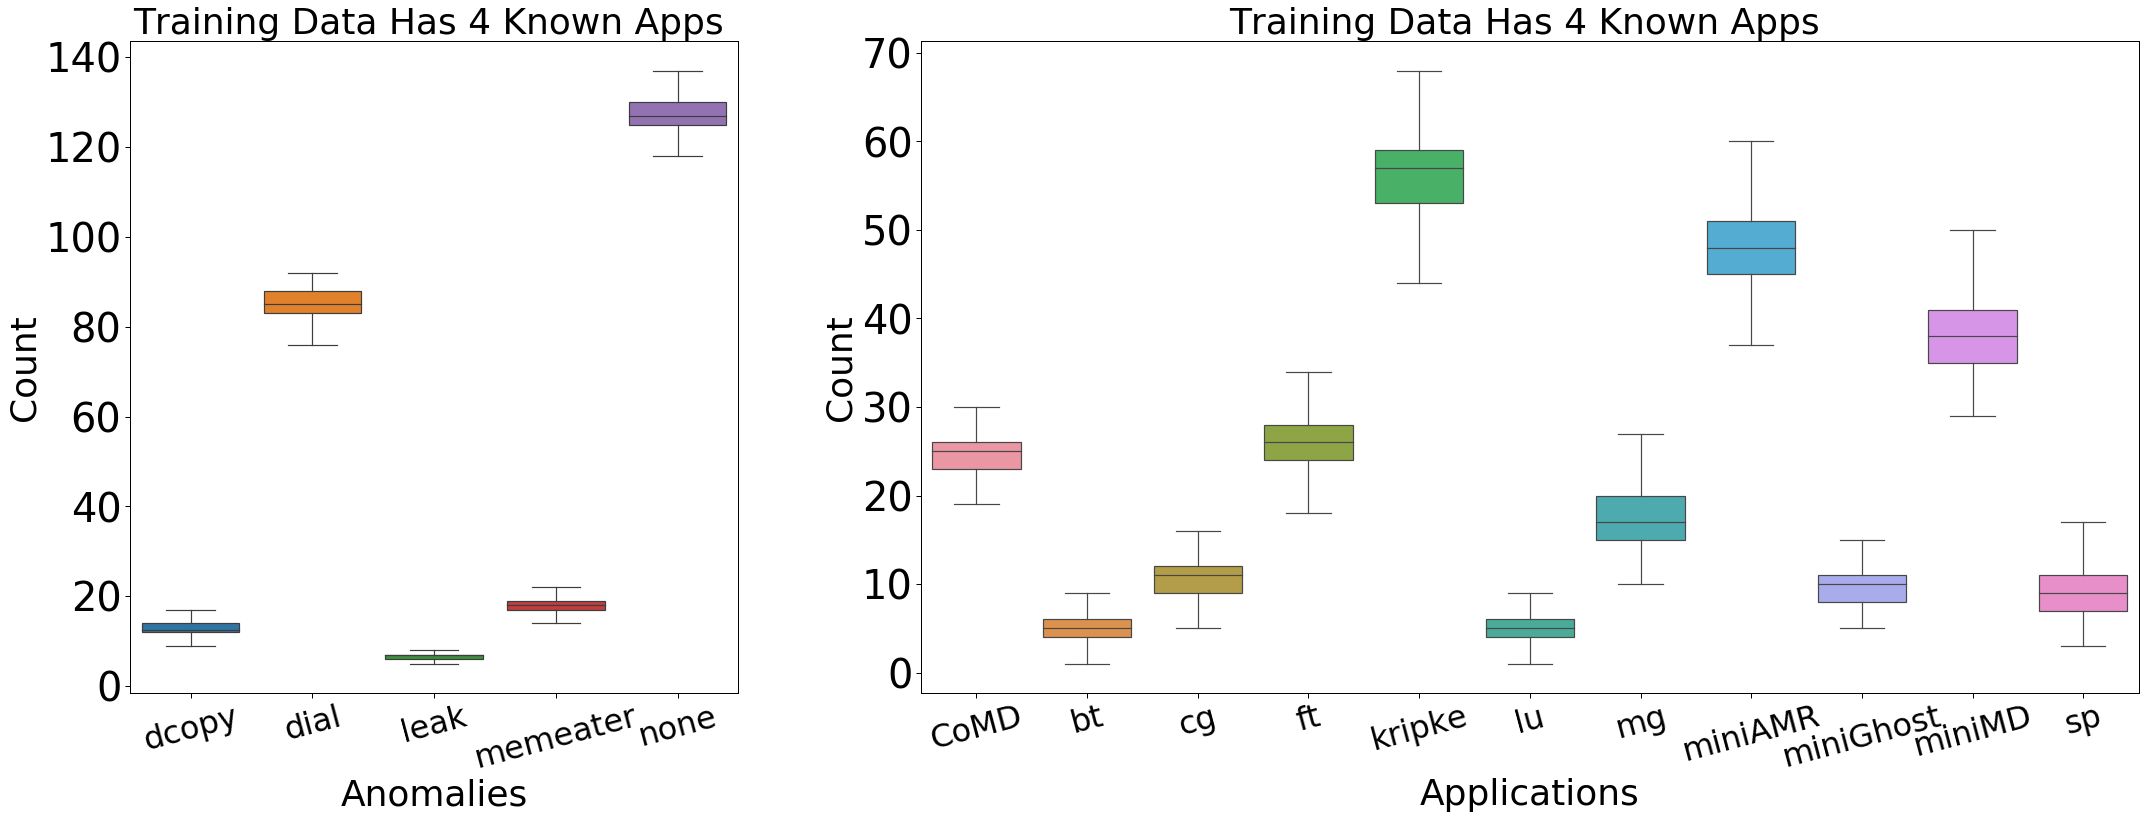

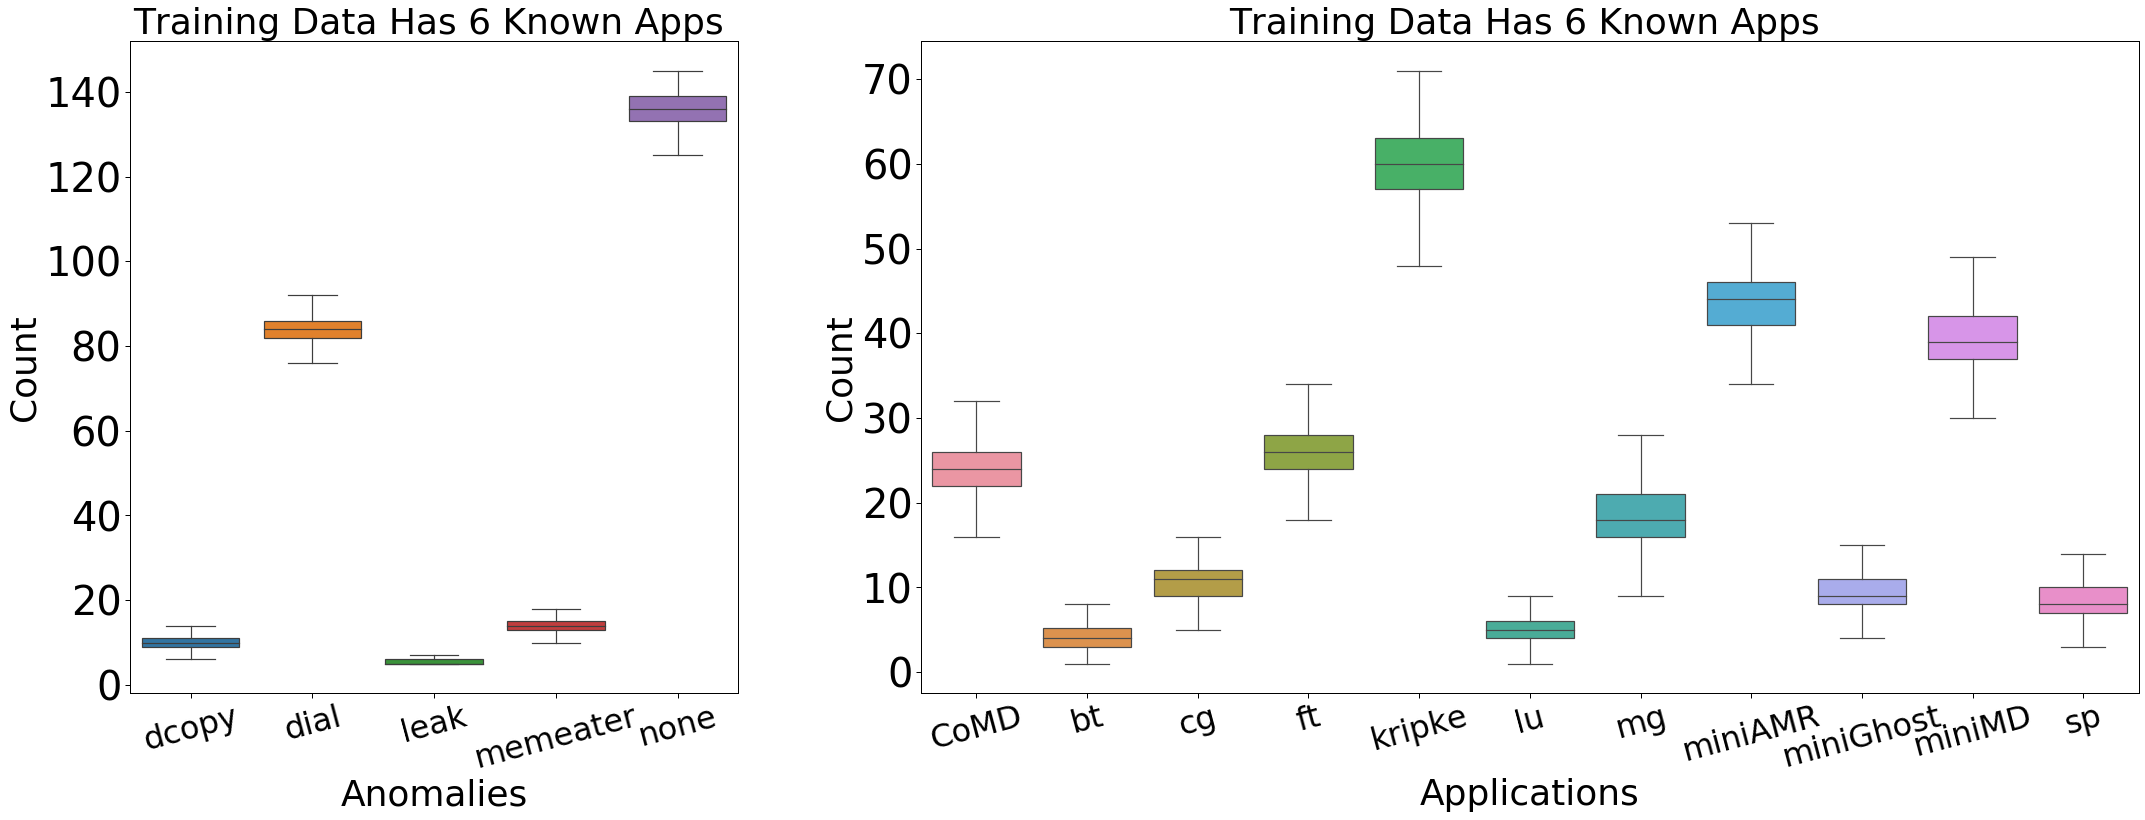

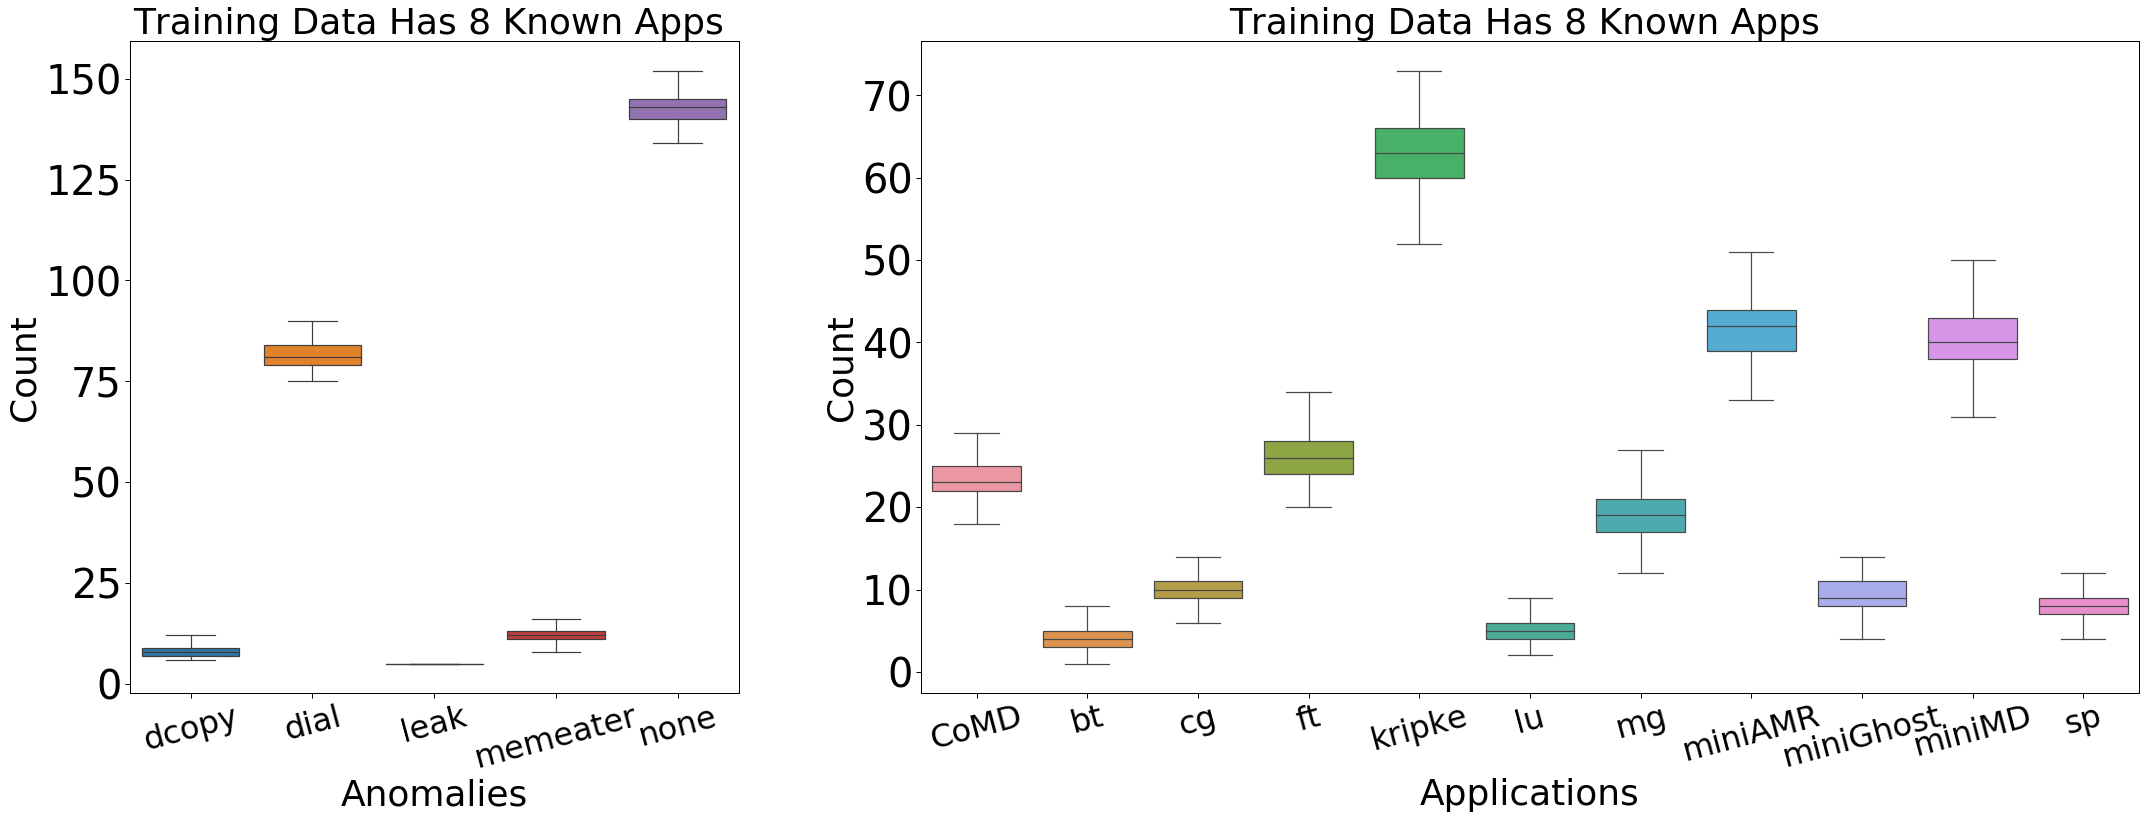

In [13]:
for unique_known_train_app in unique_known_train_apps:
    
    temp_result_df = result_df[result_df['num_known_train_apps'] == unique_known_train_app]
    
    #Plot the Anom Distribution Across Different Unknown Scenarions
    anom_dist_df = temp_result_df.groupby(['train_apps','anoms']).size().reset_index(name="counts")

    fig, ax = plt.subplots(1,2,figsize=(param_dict['fig_width'], param_dict['fig_height']),gridspec_kw={'width_ratios': [1, 2]})

    sns.catplot(x="anoms", y="counts", kind="box", data=anom_dist_df, sym='', ax=ax[0])

    ax[0].set_ylabel("Count",size=param_dict['y_label_font'])           
    ax[0].set_xlabel("Anomalies",size=param_dict['x_label_font'])

    ax[0].set_title(f"Training Data Has {unique_known_train_app} Known Apps ",fontsize=param_dict['title_size'])

    ax[0].tick_params(axis='x', labelsize= param_dict['x_ticks_font'], rotation=15)
    ax[0].tick_params(axis='y', labelsize= param_dict['y_ticks_font'])

    plt.close(2) #The most ridiculous thing ever, thanks catplot
    #plt.show()
    
    #Plot the Anom Distribution Across Different Unknown Scenarions    
    
    app_dist_df = temp_result_df.groupby(['train_apps','apps']).size().reset_index(name="counts")

    #fig, ax = plt.subplots(1,1,figsize=(param_dict['fig_width'], param_dict['fig_height']))

    sns.catplot(x="apps", y="counts", kind="box", data=app_dist_df, sym='', ax=ax[1])

    ax[1].set_ylabel("Count",size=param_dict['y_label_font'])           
    ax[1].set_xlabel("Applications",size=param_dict['x_label_font'])

    ax[1].set_title(f"Training Data Has {unique_known_train_app} Known Apps ",fontsize=param_dict['title_size'])

    ax[1].tick_params(axis='x', labelsize= param_dict['x_ticks_font'], rotation=15)
    ax[1].tick_params(axis='y', labelsize= param_dict['y_ticks_font'])

    plt.close(2) #The most ridiculous thing ever, thanks catplot
    plt.show()    